# EDS296 HW1: Plotting Time Series with CMIP6 Data
### Author & Date: 
Madison Enda  04/21/2025
Github Link: https://github.com/madisonenda/Time-Series-Plots

### Import packages

In [52]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np

### Pull data from Amazon Web Services

In [7]:
# First model: CanESM5

# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for CanESM5 data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Model CanESM5
source_id = ['CanESM5']

# experiment_id: Historical, ssp126, and ssp370
experiment_ids = ['historical', 'ssp126', 'ssp370']

# member_id: Ensemble member r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: Monthly atmosphere data
table_id = 'Amon' 

# variable_id: surface air temperature (tas)
variable_id = 'tas'

In [8]:
# Second model: 'CESM2'

# Open the CMIP6 data catalog, store as a variable
catalog_2 = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Specify search terms to query catalog for 'CESM2' data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids_2 = ['ScenarioMIP', 'CMIP'] 

# source_id: Model 'CESM2'
source_id_2 = ['CESM2']

# experiment_id: Historical and the four main SSPs
experiment_ids_2 = ['historical', 'ssp126','ssp370']

# member_id: Ensemble member r10i1p1f1
member_id_2 = 'r10i1p1f1'

# table_id: Monthly atmosphere data
table_id_2 = 'Amon' 

# variable_id: surface air temperature (tas)
variable_id_2 = 'tas'

### Query catalog and find historical data and future projection for CanESM5 model

In [25]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

# Read in the historical data file
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP126 data file
ssp126_data = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [35]:
# Concatenate historical and future projection data ssp126
CanESM5_data = xr.concat([hist_data, ssp126_data], dim="time")

# Concatenate historical and future projection data ssp370
CanESM5_data_2 = xr.concat([hist_data_2, ssp370_data], dim="time")

### Query catalog and find historical data and future projection for CESM2 model

In [34]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids_2, source_id=source_id_2, experiment_id=experiment_ids_2, 
                     member_id=member_id_2, table_id=table_id_2, variable_id=variable_id_2)

# Display data frame associated with results
display(res.df)

# Read in the historical data file
hist_data_2 = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP370 data file
ssp126_data_2 = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})

# Read in the SSP370 data file
ssp370_data_2 = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
2,ScenarioMIP,NCAR,CESM2,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [36]:
# Concatenate historical and future projection data ssp126
cesm2_data = xr.concat([hist_data_2, ssp126_data_2], dim="time")

# Concatenate historical and future projection data ssp370
cesm2_data_2 = xr.concat([hist_data_2, ssp370_data_2], dim="time")

### Location: New York City, New York

- This region is an example of a highly urban area, with little vegetation. Large amounts of impervious surface area result in increased heat and decreased absorption of moisture, meaning the effects of increased air temperature would be difficult to mitigate. I used to live on Long Island, very close to NYC, and the city felt incredibly hot and muggy in the summer (even worse than LA to me, oddly enough). Many climate models show major changes predicted for NY, and this lead me to chose it as my location for this project. I predict that it will become much hotter in New York (i.e. the difference in future projection to historical data will be rather noticable). 

## Plot the time series data for Model 1: CanESM5

### Historical for CanESM5

In [59]:
# Select tas variable, store as xarray DataArray
tas = hist_data['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

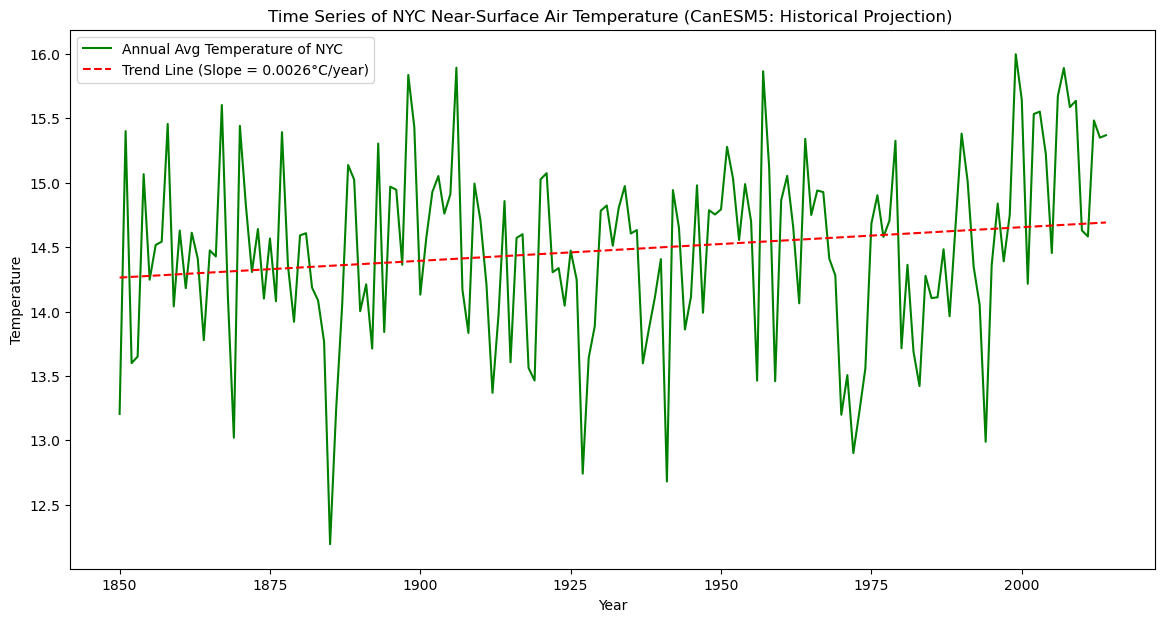

In [60]:
# Plot the annual air temperature averages for the CanESM5 historical data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='green')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CanESM5: Historical Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

### ssp126 for CanESM5

In [61]:
# Select tas variable, store as xarray DataArray
tas = CanESM5_data['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

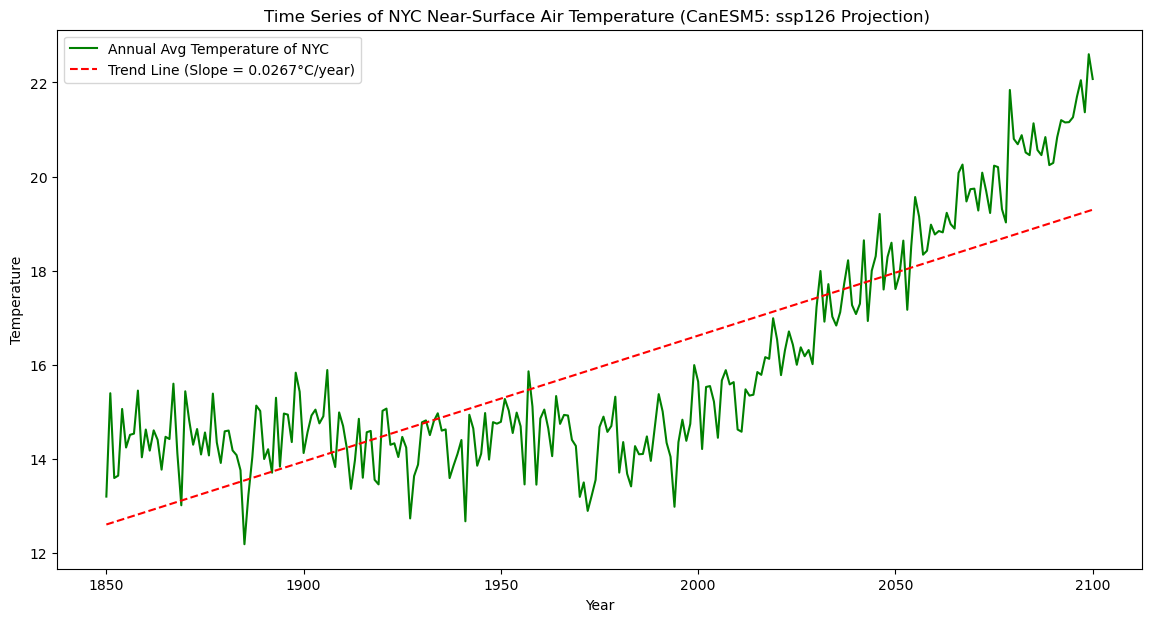

In [62]:
# Plot the annual air temperature averages for the CanESM5 historical & ssp126 data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='green')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CanESM5: ssp126 Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

### ssp370 for CanESM5

In [63]:
# Select tas variable, store as xarray DataArray
tas = CanESM5_data_2['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

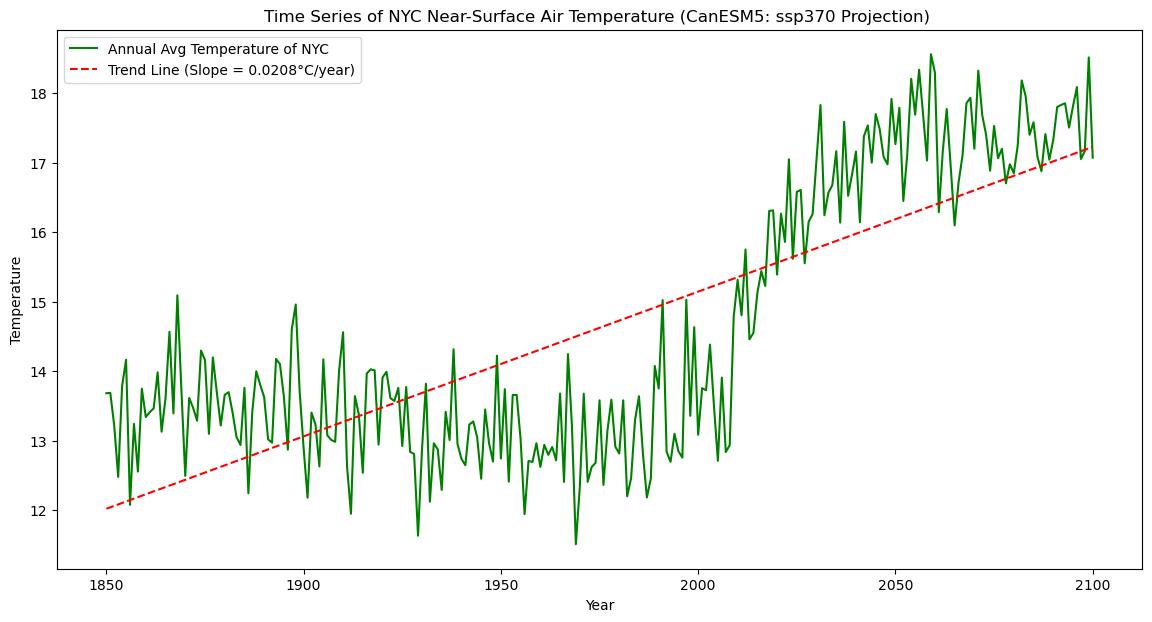

In [64]:
# Plot the annual air temperature averages for the CanESM5 historical & ssp370 data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='green')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CanESM5: ssp370 Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

- The historic data for this model shows an ever so slight increase in near-surface air temperature (tas), whereas the historic and projection data combined shows a dramatic increase (that I would consider to be a statistically significant increase) through the year 2085 for both ssp126 and ssp370. 
- Higher temperatures would result in a great many changes to the NYC environment: issues like increased toxic algal blooms in the East and Hudson rivers, increased risk of fires, increased instances of heatstroke and exposure related illnesses, etc. A change this significant would devestate the local ecosystems NYC relies on, and without adequate access to such resources (being in a highly urban area), people living here would either need to pay inordinate amounts of money to pull them from other places(which would spark major controversy), or suffer massively.

## Plot the time series data for Model 2: CESM2

### Historical for CESM2

In [65]:
# For CESM2 historic data
# Select tas variable, store as xarray DataArray
tas = hist_data_2['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

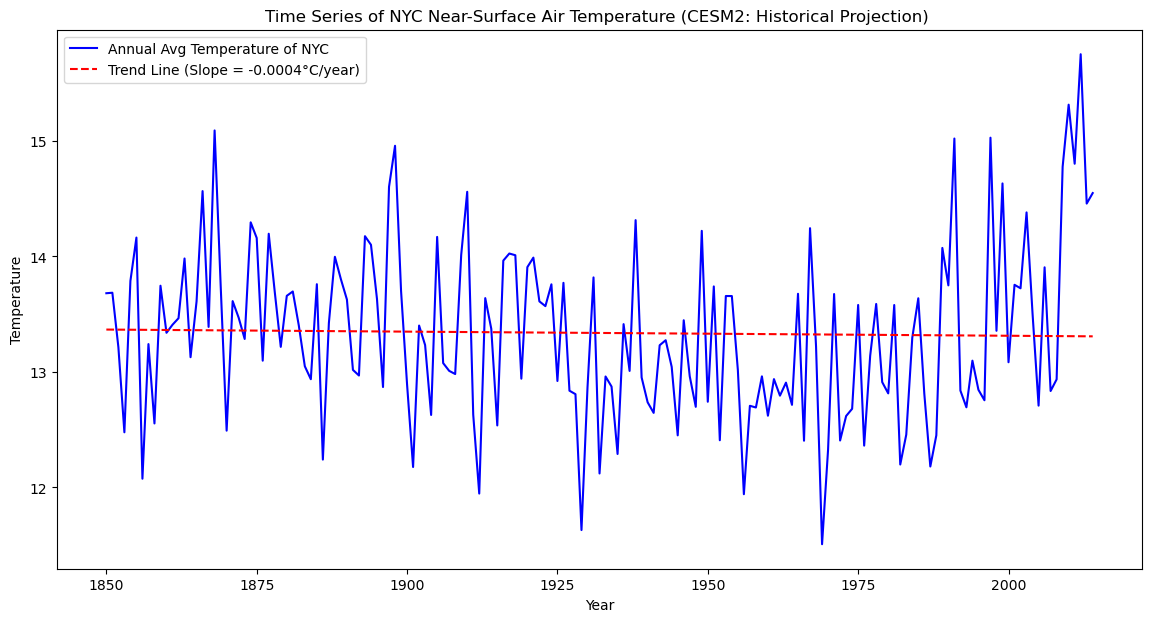

In [66]:
# Plot the annual air temperature averages for the CESM2 historical data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='blue')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CESM2: Historical Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

### ssp126 for CESM2

In [67]:
# For CESM2 ssp126 data
# Select tas variable, store as xarray DataArray
tas = cesm2_data['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

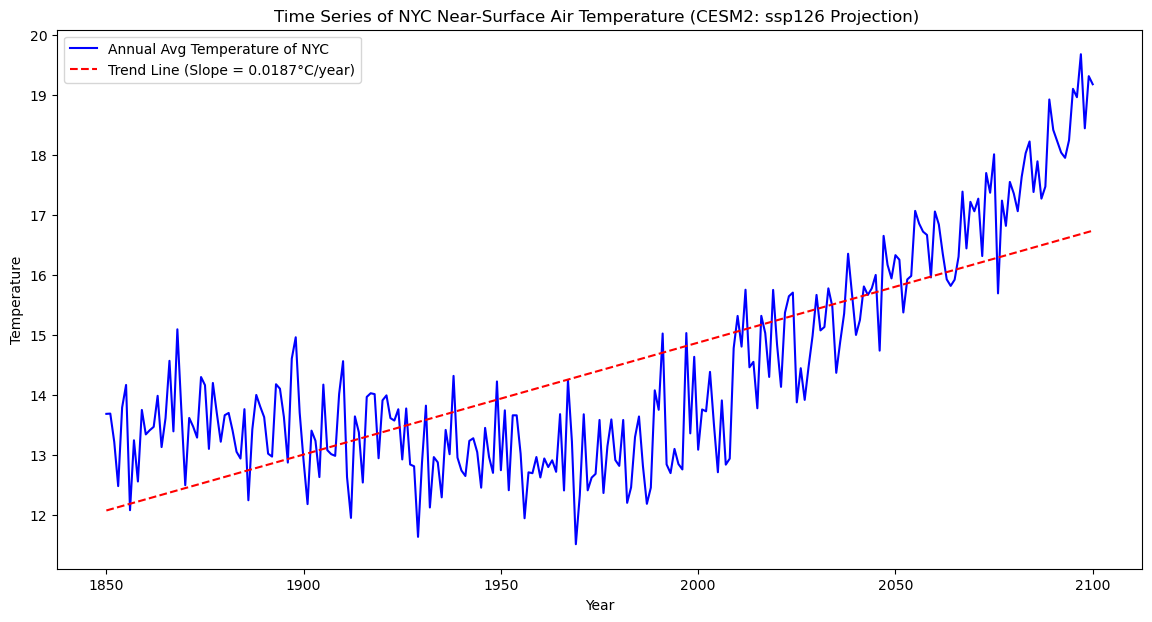

In [68]:
# Plot the annual air temperature averages for the CESM2 ssp126 data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='blue')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CESM2: ssp126 Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

### ssp370 for CESM2

In [69]:
# For CESM2 ssp370 data
# Select tas variable, store as xarray DataArray
tas = cesm2_data_2['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

# Do a spatial average over the region by averaging over lat, lon dimensions
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

annual_mean = tas_NYC.groupby('time.year').mean()
annual_mean = annual_mean - 273.15

# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x = np.polyfit(annual_mean.year, annual_mean, 1)

# Generate a polynomial object using those best-fit parameters
trend_line = np.poly1d(x)

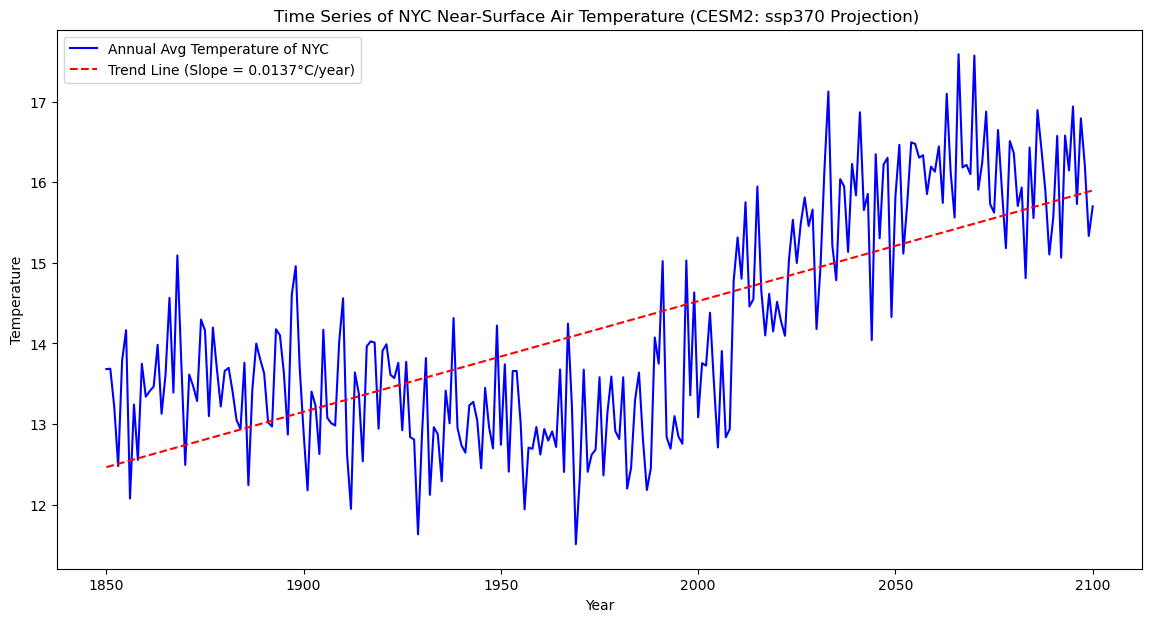

In [70]:
# Plot the annual air temperature averages for the CESM2 ssp370 data
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='blue')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Time Series of NYC Near-Surface Air Temperature (CESM2: ssp370 Projection) ')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

- The historic annual data for the CESM2 model seemingly indicates a decline in temperature over time, which is rather contradictory to all other models. Indeed, the historical and ssp combined projection data for the CESM2 model shows increases in tas over time, granted they are much less severe (less linear increase) than projected in the first model CanESM5. Looking at the changes in the combined historic/projection plots, I would still consider these changes to be statistically significant, however. 
- These changes would likely still result in the same issues mentioned regarding the CanESM5 historic and projection data above, but relief efforts would be slightly less expensive, and would likely result in fewer casualties, injuries, and ecosystem disasters.